<h1 style="text-align:center; color:green; font-weight:bold; font-size:36px;">Germany Car Market Analysis and Price Prediction</h1>

### Importing Important Libraries

In [179]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib

### Loading And Overview Data

In [142]:
df = pd.read_csv('germany-dataset.csv')

In [143]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [144]:
# size of dataset
df.shape

(46405, 9)

In [145]:
# getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [146]:
# Getting general statistics of the dataset
df.describe()

,mileage,price,hp,year
count,4.640500e+04,4.640500e+04,46376.000000,46405.000000
mean,7.117786e+04,1.657234e+04,132.990987,2016.012951
std,6.262531e+04,1.930470e+04,75.449284,3.155214
min,0.000000e+00,1.100000e+03,1.000000,2011.000000
25%,1.980000e+04,7.490000e+03,86.000000,2013.000000
50%,6.000000e+04,1.099900e+04,116.000000,2016.000000
75%,1.050000e+05,1.949000e+04,150.000000,2019.000000
max,1.111111e+06,1.199900e+06,850.000000,2021.000000


### Processing Dataset

In [147]:
# cleaning missing value
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [148]:
df = df.dropna()

In [149]:
df.duplicated().sum()

2124

In [150]:
df = df.drop_duplicates()
df.shape

(43947, 9)

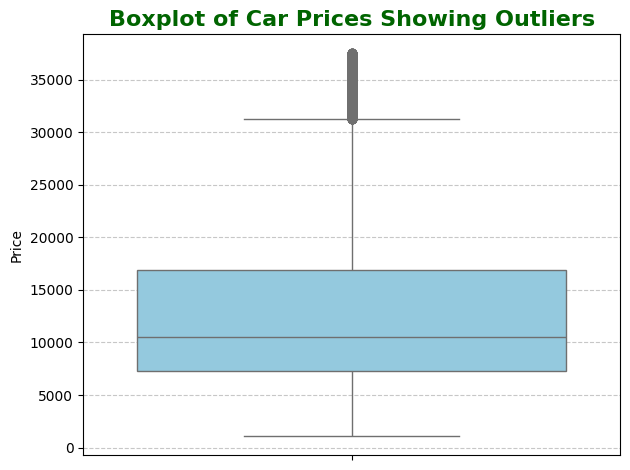

In [163]:
# Boxplot of Car Prices Showing Outliers
sns.boxplot(y=df['price'], color='skyblue')
plt.title('Boxplot of Car Prices Showing Outliers', fontsize=16, color='darkgreen', fontweight='bold')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [152]:
# --- Outlier Detection Using Z-Score Method ---
from scipy.stats import zscore

# Calculate z-scores for 'price'
# df['z_score'] = zscore(df['price'])

# Identify outliers with z-score > 3 or < -3
# outliers_z = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
# print(f"Number of Outliers Detected by Z-Score Method: {outliers_z.shape[0]}")


# --- Outlier Detection Using Interquartile Range (IQR) Method ---
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Number of Outliers Detected by IQR Method: {outliers_iqr.shape[0]}")


Number of Outliers Detected by IQR Method: 3048


In [153]:
# df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
# print(df.shape)

In [154]:
df = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]
df.shape

(40899, 9)

### Correlation Matrix of Car Features

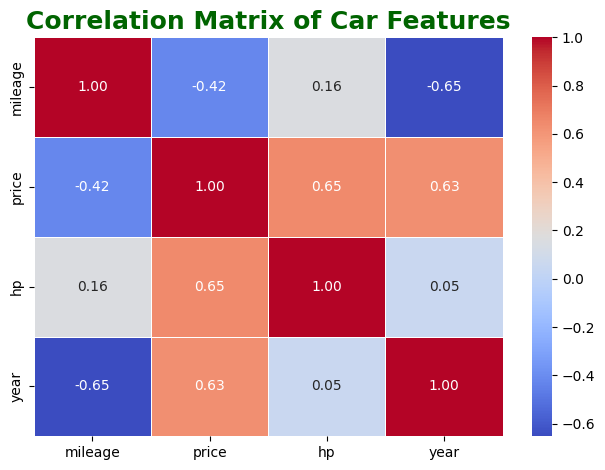

In [164]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Car Features', fontsize=18, color='darkgreen', fontweight='bold')
plt.tight_layout()
plt.show()

### Impact of Mileage and Horsepower on Car Price

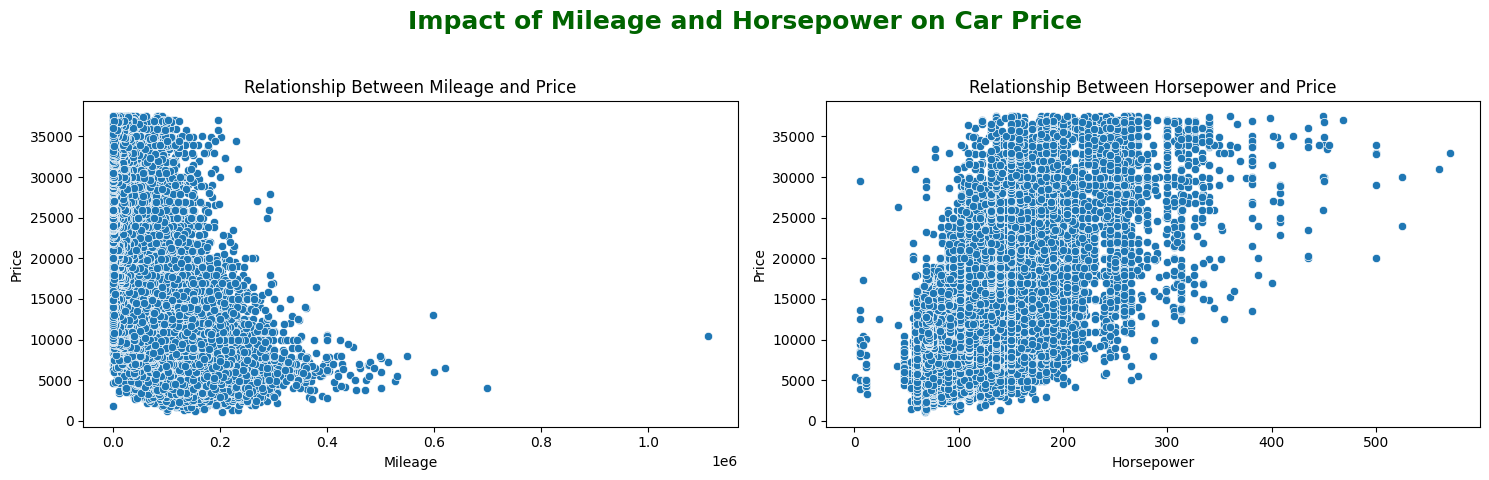

In [156]:
plt.figure(figsize=(15,5))

# Mileage vs Price
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='mileage', y='price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Relationship Between Mileage and Price')

# Horsepower vs Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='hp', y='price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Relationship Between Horsepower and Price')

# Main title for all
plt.suptitle('Impact of Mileage and Horsepower on Car Price', fontsize=18, color='darkgreen', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### "Distribution Analysis of Key Car Attributes

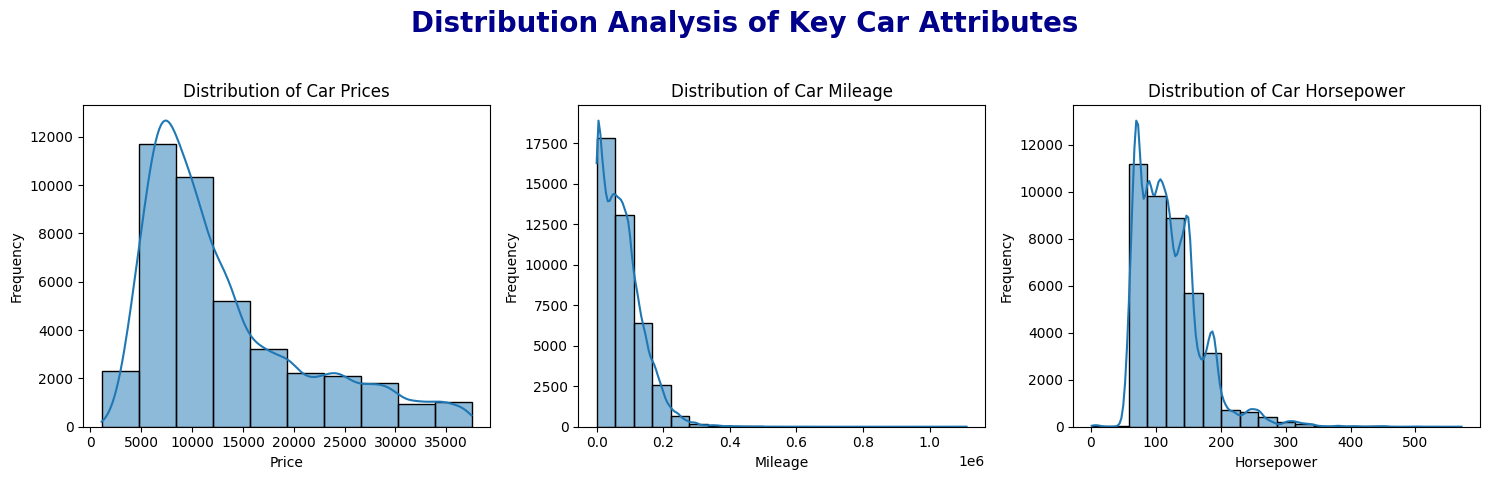

In [157]:
plt.figure(figsize=(15,5))
# Price Distribution
plt.subplot(1, 3, 1)
sns.histplot(x=df['price'], bins=10, kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")

# Mileage Distribution
plt.subplot(1, 3, 2)
sns.histplot(x=df['mileage'], bins=20, kde=True)
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.title("Distribution of Car Mileage")

# Horsepower Distribution
plt.subplot(1, 3, 3)
sns.histplot(x=df['hp'], bins=20, kde=True)
plt.xlabel("Horsepower")
plt.ylabel("Frequency")
plt.title("Distribution of Car Horsepower")

# Main Title
plt.suptitle("Distribution Analysis of Key Car Attributes", fontsize=20, color='darkblue', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for main title
plt.show()

In [158]:
df.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

### Frequency Distribution of Car Features

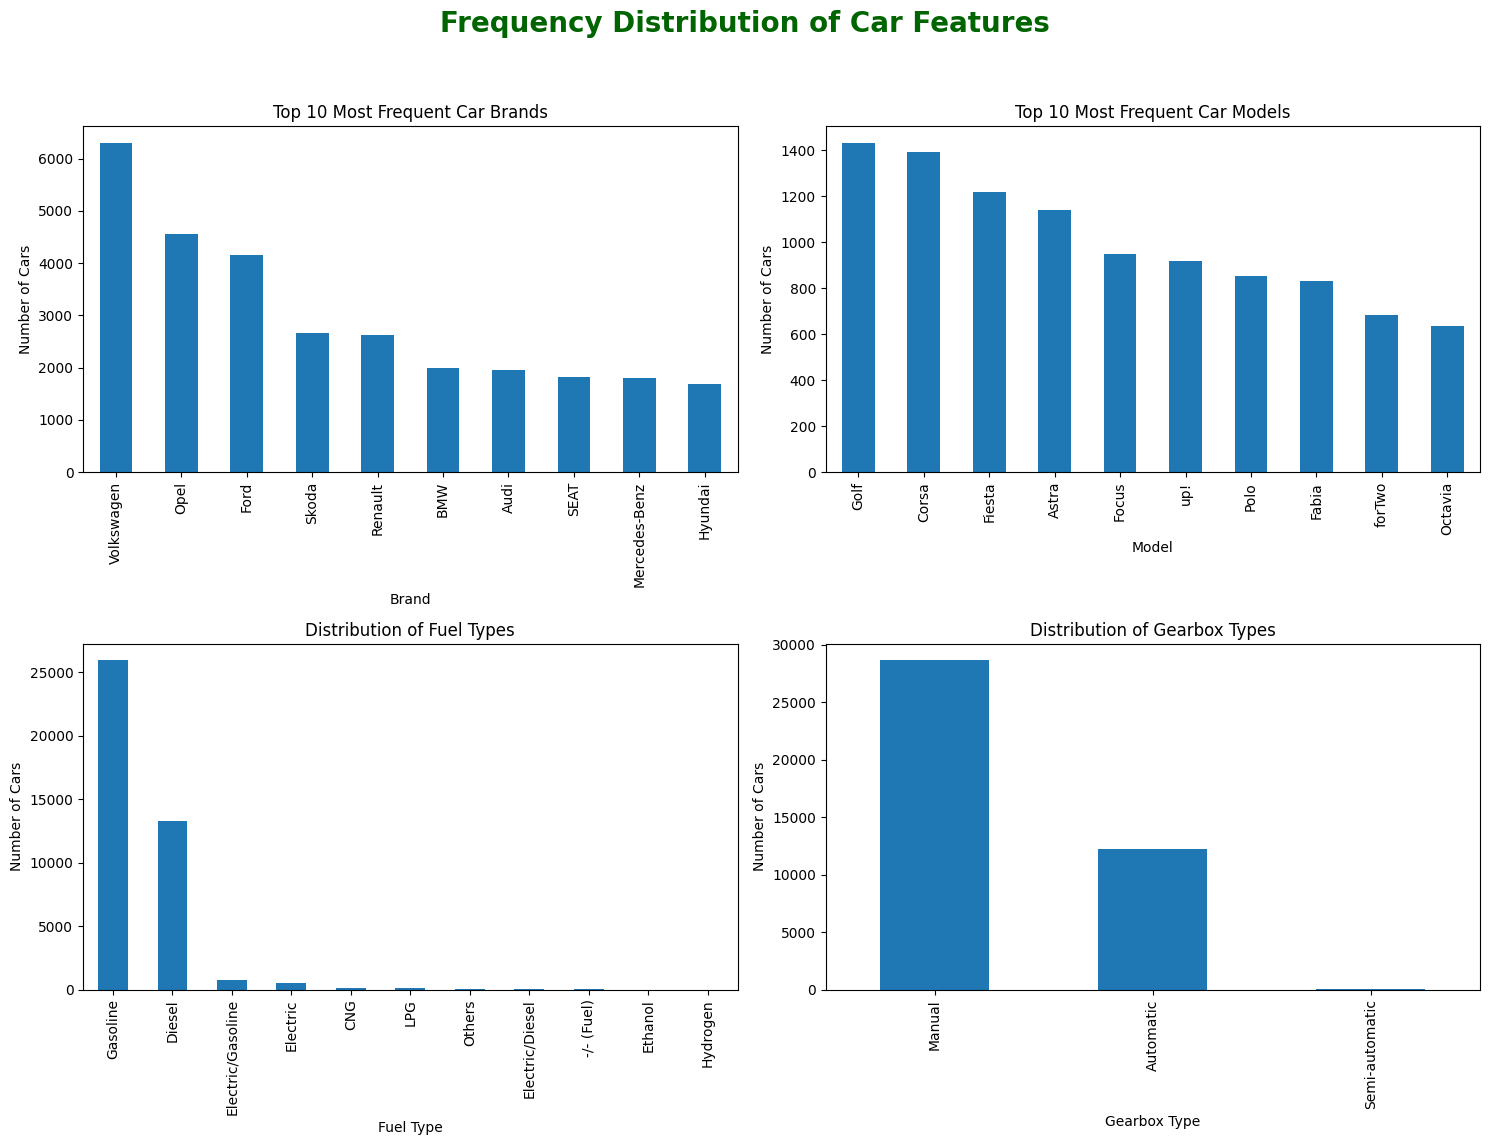

In [159]:
plt.figure(figsize=(15,12))

# Top 10 Most Frequent Car Brands
plt.subplot(2,2,1)
df['make'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.title('Top 10 Most Frequent Car Brands')

# Top 10 Most Frequent Car Models
plt.subplot(2,2,2)
df['model'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Number of Cars')
plt.title('Top 10 Most Frequent Car Models')

# Distribution of Fuel Types
plt.subplot(2,2,3)
df['fuel'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.title('Distribution of Fuel Types')

# Distribution of Gearbox Types
plt.subplot(2,2,4)
df['gear'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Gearbox Type')
plt.ylabel('Number of Cars')
plt.title('Distribution of Gearbox Types')

# Main title for all subplots
plt.suptitle('Frequency Distribution of Car Features', fontsize=20, color='darkgreen', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for main title
plt.show()


### Total Sales Price Analysis Across Car Features

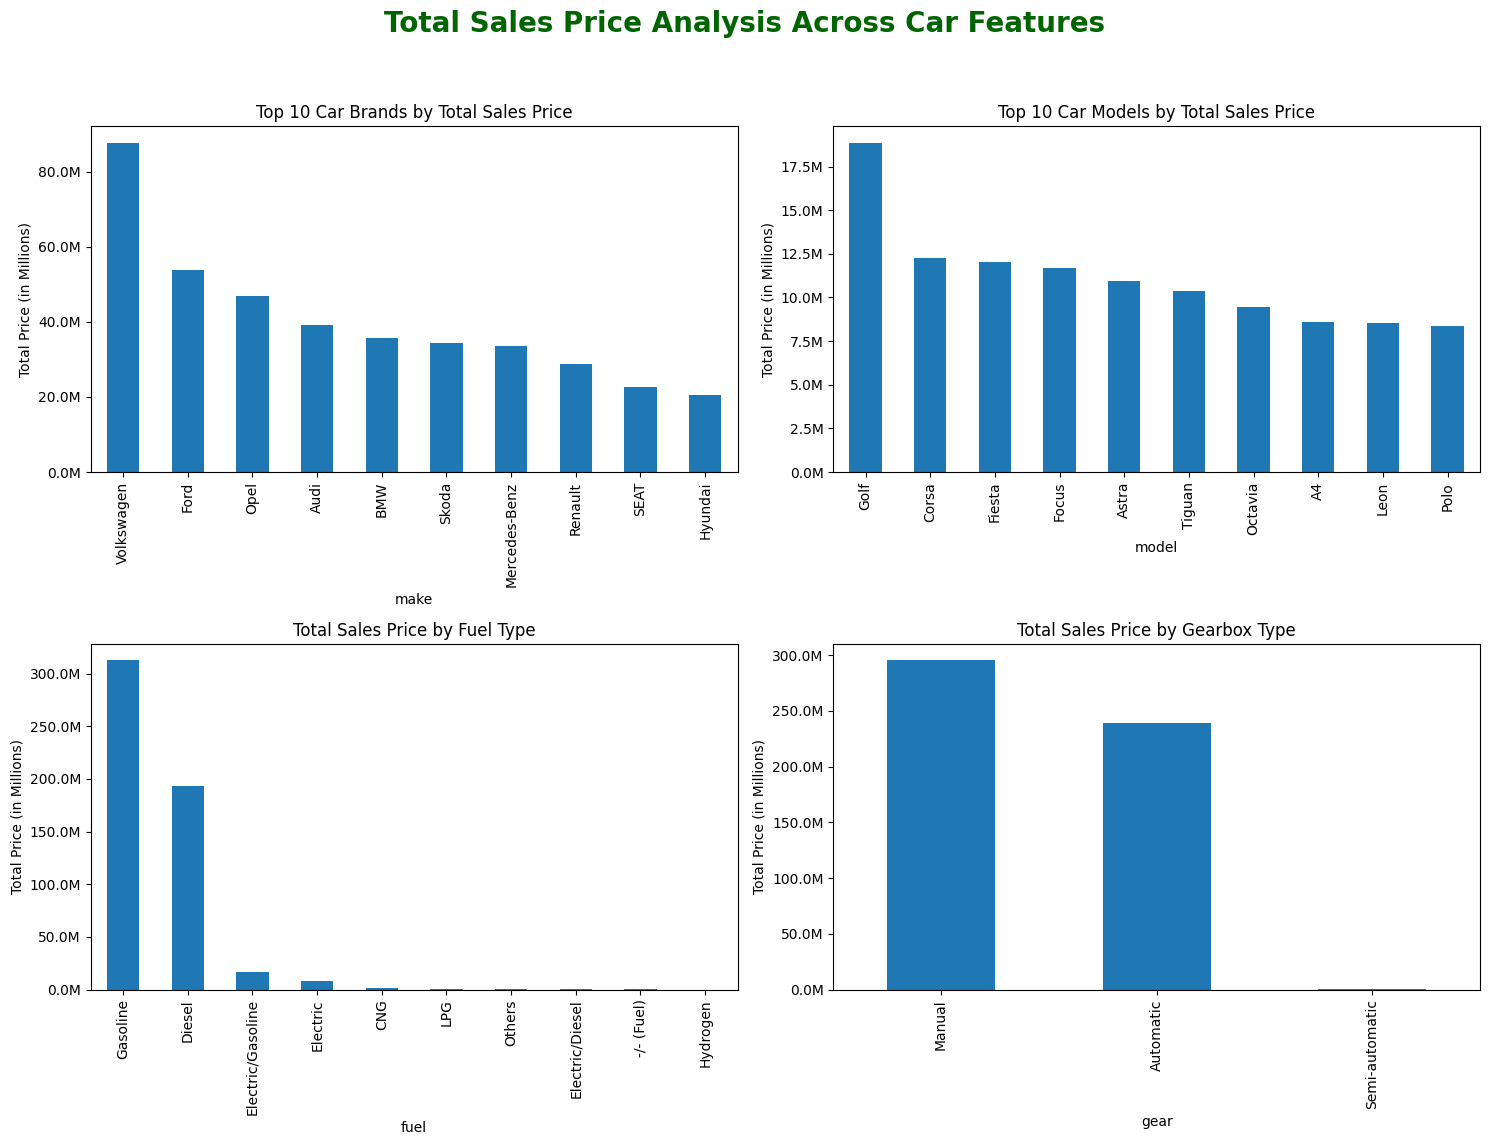

In [160]:
plt.figure(figsize=(15,12))

# First plot: Brands
plt.subplot(2,2,1)
df.groupby(['make'])['price'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Total Price (in Millions)")
plt.title('Top 10 Car Brands by Total Sales Price')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

# Second plot: Models
plt.subplot(2,2,2)
df.groupby(['model'])['price'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Total Price (in Millions)")
plt.title('Top 10 Car Models by Total Sales Price')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

# Third plot: Fuel Types
plt.subplot(2,2,3)
df.groupby(['fuel'])['price'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Total Price (in Millions)")
plt.title('Total Sales Price by Fuel Type')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

# Fourth plot: Gear Types
plt.subplot(2,2,4)
df.groupby(['gear'])['price'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Total Price (in Millions)")
plt.title('Total Sales Price by Gearbox Type')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

# Main title for all subplots
plt.suptitle('Total Sales Price Analysis Across Car Features', fontsize=20, color='darkgreen', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for main title
plt.show()


### Trends in Car Prices Over Time

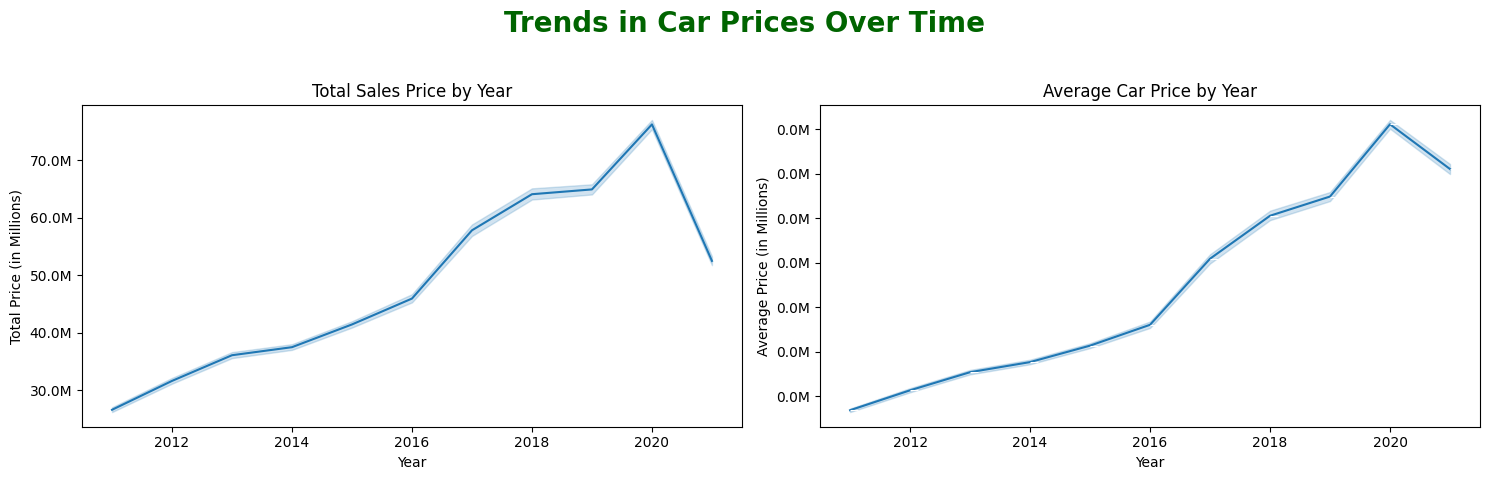

In [161]:
plt.figure(figsize=(15,5))

# Total Sales Price by Year
plt.subplot(1,2,1)
sns.lineplot(data=df, x='year', y='price', estimator='sum',markers=True)
plt.xlabel('Year')
plt.ylabel('Total Price (in Millions)')
plt.title('Total Sales Price by Year')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

# Average Car Price by Year
plt.subplot(1,2,2)
sns.lineplot(data=df, x='year', y='price', marker=True)  # default estimator is mean
plt.xlabel('Year')
plt.ylabel('Average Price (in Millions)')
plt.title('Average Car Price by Year')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:.1f}M'))

# Main title for all subplots
plt.suptitle('Trends in Car Prices Over Time', fontsize=20, color='darkgreen', fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for main title
plt.show()


### Predicting Car Prices: A Comparison of Linear Regression and Decision Tree Models"

##### --- Data Preprocessing ---
###### Handling categorical variables

In [169]:
label_encoder = LabelEncoder()
df['make'] = label_encoder.fit_transform(df['make'])
df['model'] = label_encoder.fit_transform(df['model'])
df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['gear'] = label_encoder.fit_transform(df['gear'])
df['offerType'] = label_encoder.fit_transform(df['offerType'])

In [170]:
# Checking the datatypes after encoding
df.dtypes

mileage        int64
make           int32
model          int32
fuel           int32
gear           int32
offerType      int32
price          int64
hp           float64
year           int64
dtype: object

###### Feature and Target Variables

In [171]:
X = df[['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'hp', 'year']]  # Features
y = df['price']  # Target variable

######  Splitting the dataset into training and testing sets (80% training, 20% testing)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Linear Regression Model

In [184]:
# Initializing and training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_lr = lr_model.predict(X_test)

#save model
joblib.dump(lr_model,'linear_regression_model.joblib')

# --- Model Evaluation (Linear Regression) ---
print("Linear Regression Performance Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr)}")

Linear Regression Performance Metrics:
Mean Absolute Error: 2376.1292009789627
Mean Squared Error: 10109017.586800251
Root Mean Squared Error: 3179.468129546238
R2 Score: 0.8369077117733743


##### Decision Tree Regressor Model

In [183]:
# Initializing and training the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_dt = dt_model.predict(X_test)

#save model
joblib.dump(dt_model,'decision_tree_regression_model.joblib')

# --- Model Evaluation (Decision Tree) ---
print("Decision Tree Performance Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_dt)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_dt))}")
print(f"R2 Score: {r2_score(y_test, y_pred_dt)}")


Decision Tree Performance Metrics:
Mean Absolute Error: 1811.141429404947
Mean Squared Error: 7499117.72946137
Root Mean Squared Error: 2738.4517029630756
R2 Score: 0.8790141317217911


#### The Decision Tree model is performing better overall because it has lower MAE, MSE, RMSE, and a higher R² score.

##### Visualization 
###### Comparing the predicted vs actual prices for both models

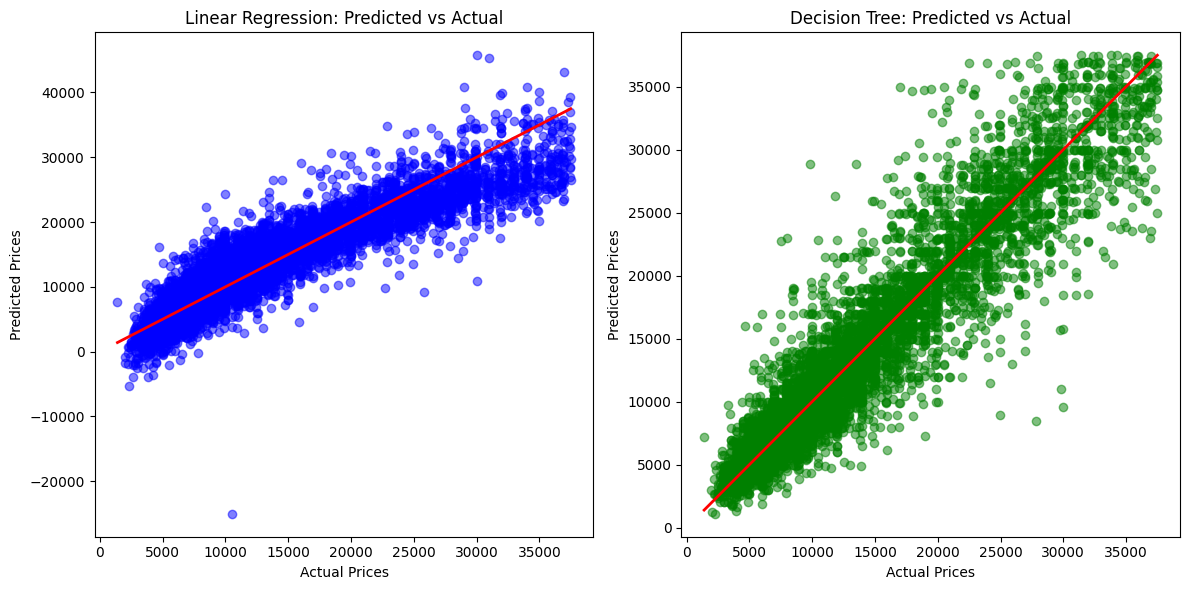

In [178]:
plt.figure(figsize=(12, 6))

# Linear Regression vs Actual Prices
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.title("Linear Regression: Predicted vs Actual")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)


# Decision Tree vs Actual Prices
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, color='green', alpha=0.5)
plt.title("Decision Tree: Predicted vs Actual")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)

plt.tight_layout()
plt.show()
